In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


#clssification 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling  import SMOTE
from sklearn.model_selection import GridSearchCV

#Regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score



In [2]:
df=pd.read_csv('global-powerplant.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


from the help of pandas library we have imported the csv file into jupyter notebook. this dataset is having 908 columns and 25 rows.The utmost important point is in our dataset we have been asked to predict two label . namely 1.primary_fuel 2.capacity_mw.
As far as we can see that our first level primary fuel is having catagorical data so we can say this is our classificatin model. and second capacity_mw is having continous data we will make Regression model .

# Exploratory Data Analysis(EDA)

In [3]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,908.0,321.046378,580.221767,0.0000,16.837500,60.000000,388.125000,4760.000
latitude,862.0,21.196189,6.248627,8.1689,16.771575,21.778300,25.516375,34.649
longitude,862.0,77.447848,4.907260,68.6447,74.258975,76.719250,79.441475,95.408
other_fuel3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,528.0,1996.876894,17.047817,1927.0000,1988.000000,2000.000000,2011.250000,2018.000
wepp_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,520.0,2018.000000,0.000000,2018.0000,2018.000000,2018.000000,2018.000000,2018.000
generation_gwh_2013,384.0,2304.059202,3794.767492,0.0000,244.458088,797.063475,2795.021500,27586.200
generation_gwh_2014,401.0,2420.393316,4013.558173,0.0000,223.650436,805.760000,3034.575000,28127.000
generation_gwh_2015,425.0,2414.072373,4183.203199,0.0000,174.174750,701.027250,3080.000000,30539.000


from above describe.Transpose method we can say that there some columns having high amount of outlier present that need to be treated AS per requirement .

In [6]:
df.shape

(908, 25)

In [7]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

from above method it is crytal clean that we have so many missing value in our dataset .some of our columns has very high missing value so i have decided columns having more than 50% missing values need to be dropped .

In [8]:
# the columns having more than 50% missing values
df.drop(['other_fuel1','other_fuel2','other_fuel3','owner','wepp_id','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_data_source','estimated_generation_gwh'],axis=1,inplace=True)

In [9]:
df.shape

(908, 13)

Now our columns has become 13 from 25 .

In [10]:
df.nunique().to_frame("unique values")

,unique values
country,1
country_long,1
name,908
gppd_idnr,908
capacity_mw,365
latitude,837
longitude,828
primary_fuel,8
commissioning_year,73
source,191


from this unique method we have observed that some of our columns have 1 unique value  and some of columns have 908 unique  value  .
these both kind of columns are just meaningless for our ML model so we have to drop it now.

column 'url' is having some kind of web document link that is not going to help our model much . we should drop it too.


In [11]:
df.drop(['name','gppd_idnr','country','country_long','year_of_capacity_data'],axis=1,inplace=True)

In [12]:
df.drop('url',axis=1,inplace=True)

In [13]:
print(df.shape)
df.head()

(908, 7)


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI


now our columns finally reduced to 7.

In [14]:
df.isnull().sum()

capacity_mw             0
latitude               46
longitude              46
primary_fuel            0
commissioning_year    380
source                  0
geolocation_source     19
dtype: int64

In [15]:
#getting list of object_datatypes
object_datatype=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='O':
     object_datatype.append(x)
print('object_datatype=',object_datatype)  

# getting list of float_datatypes
float_datatypes=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='float64':
        float_datatypes.append(x)
print('float_datatype=',float_datatypes)        

object_datatype= ['primary_fuel', 'source', 'geolocation_source']
float_datatype= ['capacity_mw', 'latitude', 'longitude', 'commissioning_year']


In [16]:
# filling the data for continous value with mean.
df['latitude'].fillna(df['latitude'].mean(),inplace=True)
df['longitude'].fillna(df['longitude'].mean(),inplace=True)
df['commissioning_year'].fillna(df['commissioning_year'].mode(),inplace=True)

In [17]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['geolocation_source']=imp.fit_transform(df['geolocation_source'].values.reshape(-1,1))
df['commissioning_year']=imp.fit_transform(df['commissioning_year'].values.reshape(-1,1))

In [18]:
df.isnull().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
commissioning_year    0
source                0
geolocation_source    0
dtype: int64

Now we have no any missing value

In [19]:
for col in object_datatype:
    print(col)
    print(df[col].value_counts())
    print("="*100)

primary_fuel
Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64
source
Central Electricity Authority                   520
CDM                                             124
Lancosola                                        10
National Renewable Energy Laboratory              8
National Thermal Power Corporation (NTPC)         6
                                               ... 
Nitin Spinners ltd                                1
Pandit Deendayal Petrolium University (PDPU)      1
Madhav Group                                      1
Manikghar Cement co                               1
Hemarus Technologies ltd                          1
Name: source, Length: 191, dtype: int64
geolocation_source
WRI                                     785
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


# Visulization

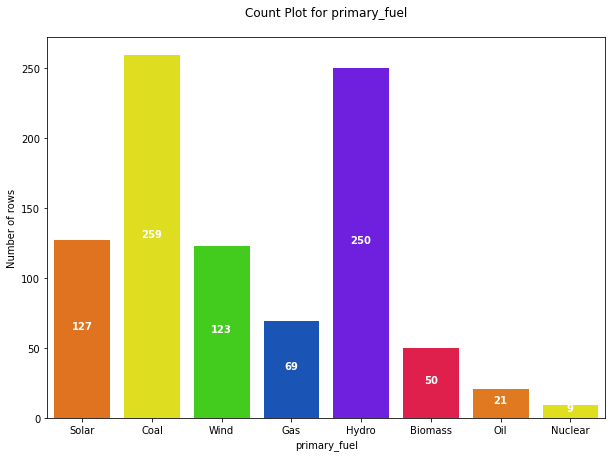

In [20]:

try:
    plt.figure(figsize=(10,7))
    col_name = 'primary_fuel'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

from the above visulizatio we confirm that in primary_fuel highest data is covered bu 'Coal',and 'Hydo'.Here primary_fuel is our targer for classification model so we have to balancr whole data before putting data for model

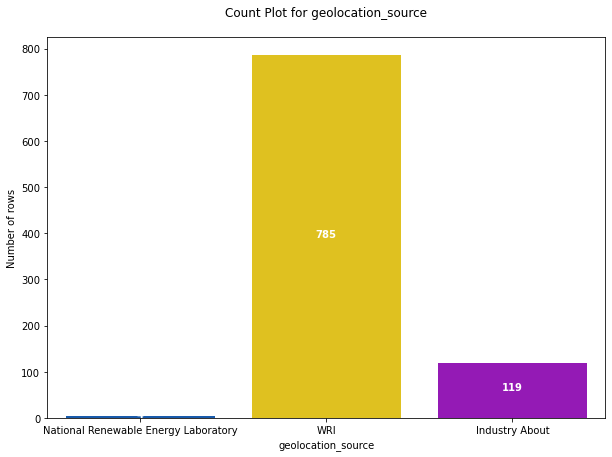

In [21]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'geolocation_source'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

In the above count plot for "geolocation_source" column we see that the highest data value is covered by WRI option and the least value which seems quite negligible has been accumulated by National Renewable Energy Laboratory.

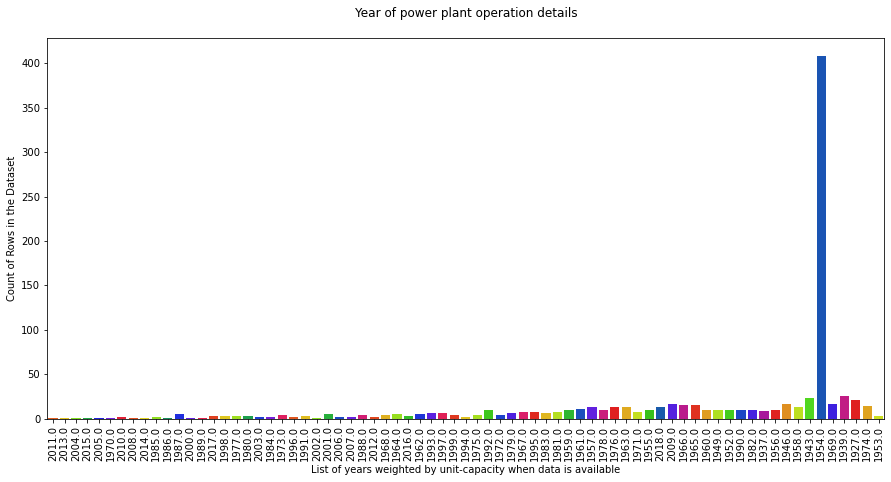

In [22]:
plt.figure(figsize=(15,7))
values = list(df['commissioning_year'].unique())
diag = sns.countplot(df["commissioning_year"], palette="prism")
diag.set_xticklabels(labels=values, rotation=90)
plt.title("Year of power plant operation details\n")
plt.xlabel("List of years weighted by unit-capacity when data is available")
plt.ylabel("Count of Rows in the Dataset")
plt.show()

In the above count plot we can see the list of years as to when the power plant data was made available. Since we had missing values in the "commissioning_year" column we replaced it with the mode wherein the year 1954 covered the most rows in our dataset compared to all the other years.

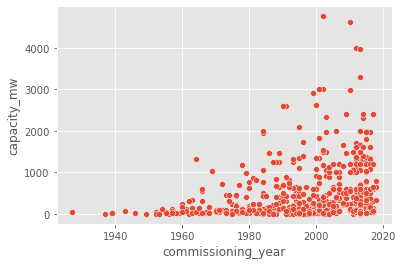

In [23]:
plt.style.use('ggplot')
sns.scatterplot(x = "commissioning_year", y = "capacity_mw", data = df)
plt.show()


in the above scatter plot we can see that the electricity generating capacity measured in mega watts was pretty low in the olden times as compared to recent years due to the invention of efficient fuel types used for power generation.

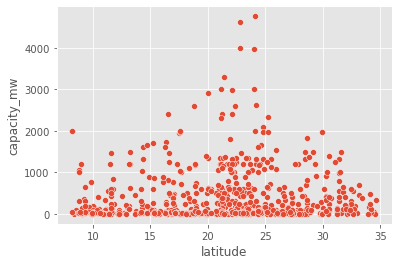

In [24]:
sns.scatterplot(x = "latitude", y = "capacity_mw", data = df)
plt.show()


In the above scatter plot we can see that the latitude geolocation for electricty generation is highest measuring the mega watts between 20 to 25 decimal degrees.

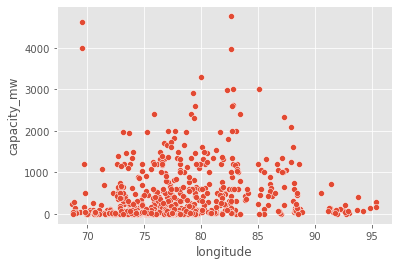

In [25]:
sns.scatterplot(x = "longitude", y = "capacity_mw", data = df)
plt.show()

In the above scatter plot we can see that the longitude geolocation for electricty generation is highest measuring the mega watts around 70 and then again between 80-85 decimal degrees.

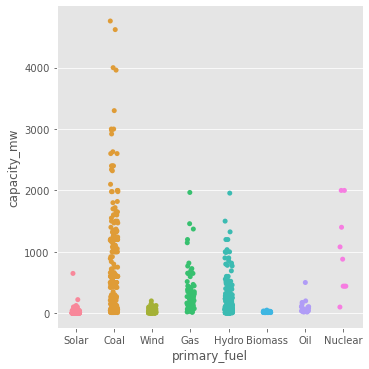

In [26]:
plt.style.use('seaborn-pastel')
sns.catplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

from  the above plot we can see that coal is the highest mean to generate electricity

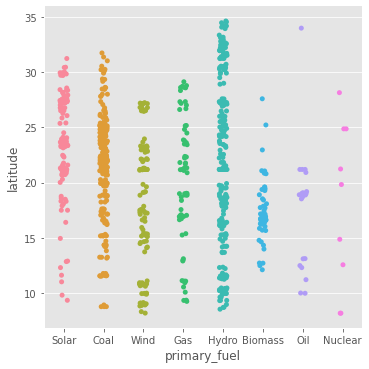

In [27]:
sns.catplot(x = "primary_fuel", y = "latitude", data = df)
plt.show()


from the above graph we can see that latitude of Hydro is all time high when it comes to generate the electricity

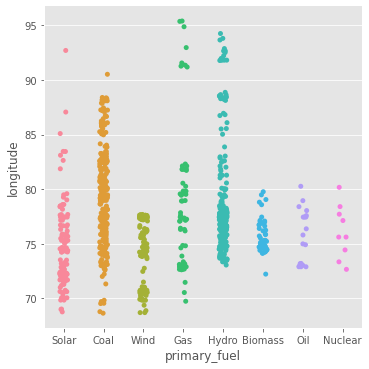

In [28]:
sns.catplot(x = "primary_fuel", y = "longitude", data = df)
plt.show()


from the above plot we can observe that longitude of hydro is always high when it comes to generate the electicity.

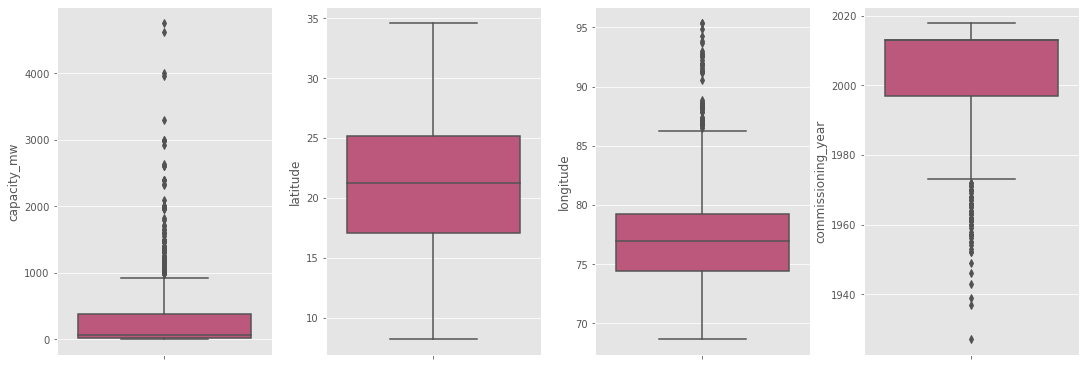

In [29]:
fig, ax=plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index=0
ax=ax.flatten()
for col,values in df[float_datatypes].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette='plasma')
    index+=1
    
plt.tight_layout(pad=.4, w_pad=.4, h_pad=1)
plt.show()

from the above plot we have observed that columns like capacity_mw , longitude, commissioning_year has some outlier present and we need to treat them.

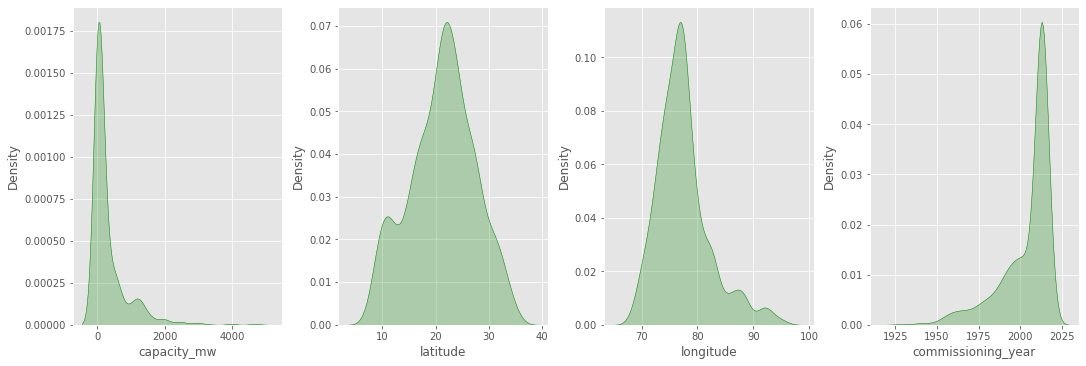

In [30]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[float_datatypes].items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

from the above plot we have seen that there are some skewness present in dataset we have to treat them before starting the Model Building processes.

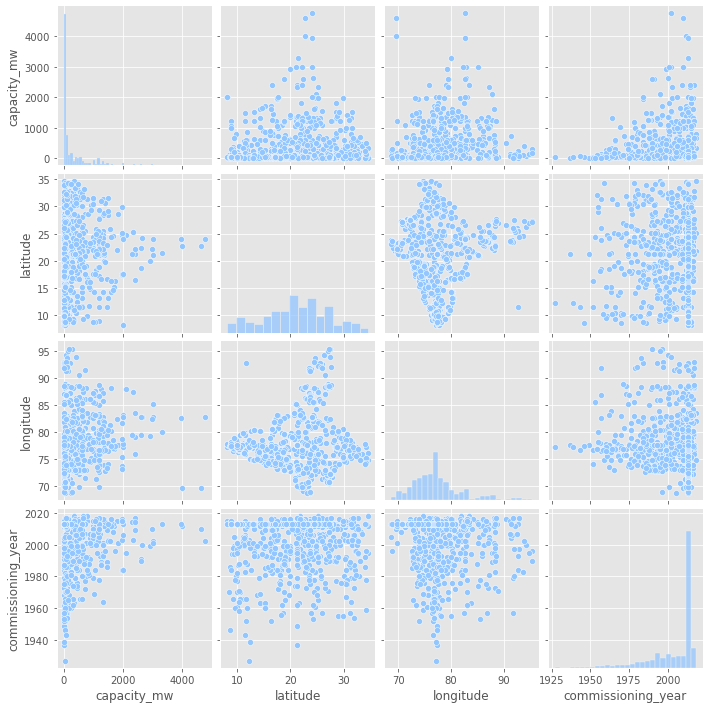

In [31]:
sns.pairplot(df)
plt.show()

# Encoding all the Object datatype columns

In [32]:
#Label Encoder
le=LabelEncoder()
df['primary_fuel']=le.fit_transform(df['primary_fuel'])
df.head(5)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,1,2013.0,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,7,2013.0,CDM,WRI
3,135.0,23.8712,91.3602,2,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,1,2015.0,Central Electricity Authority,WRI


In [33]:
#Ordinal Encoder
oe=OrdinalEncoder()
df['source']=oe.fit_transform(df['source'].values.reshape(-1,1))
df['geolocation_source']=oe.fit_transform(df['geolocation_source'].values.reshape(-1,1))

In [34]:
df.head(5)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,109.0,1.0
1,98.0,24.7663,74.6090,1,2013.0,174.0,2.0
2,39.2,21.9038,69.3732,7,2013.0,21.0,2.0
3,135.0,23.8712,91.3602,2,2004.0,22.0,2.0
4,1800.0,21.9603,82.4091,1,2015.0,22.0,2.0


# Correlation using a Heatmap
Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

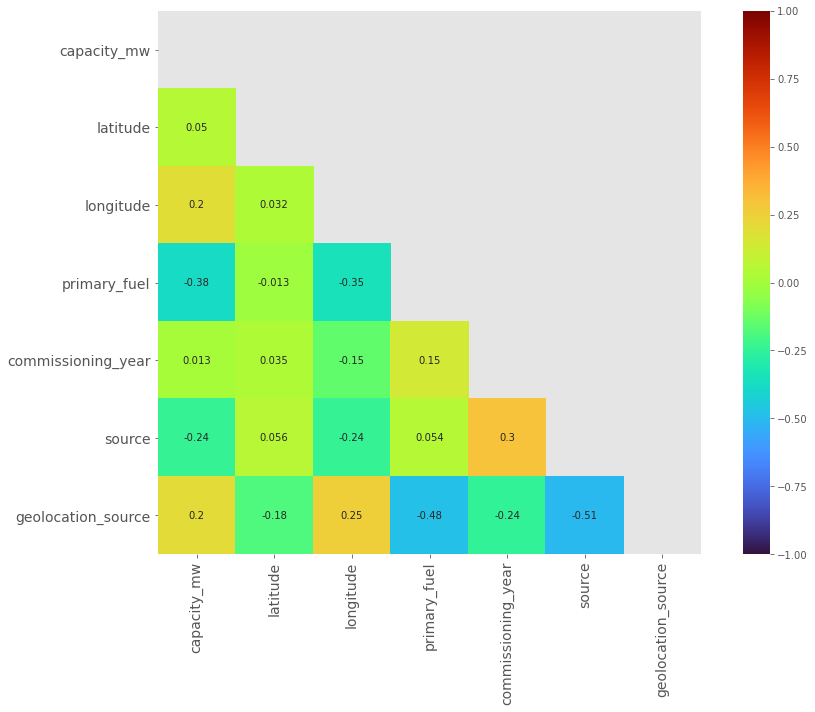

In [35]:
upper_triangle=np.triu(df.corr())
figure=plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap='turbo',annot=True,square=True,annot_kws={'size':10},mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


from the above heatmap plot we can see that our target/label primary_fuel and capacity_mw has some negative correrelation with some of features . and these feature is not highly correlated to each other . so we dont need to worry.

# Correlation Bar Plot comparing features with our labels

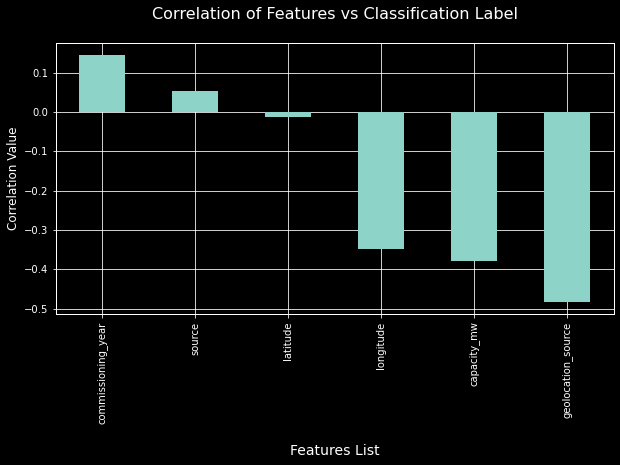

In [36]:
plt.style.use('dark_background')
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()
plt.title("Correlation of Features vs Classification Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

from the above barplot graph between feature and label found two of them are positive and four are negatively .

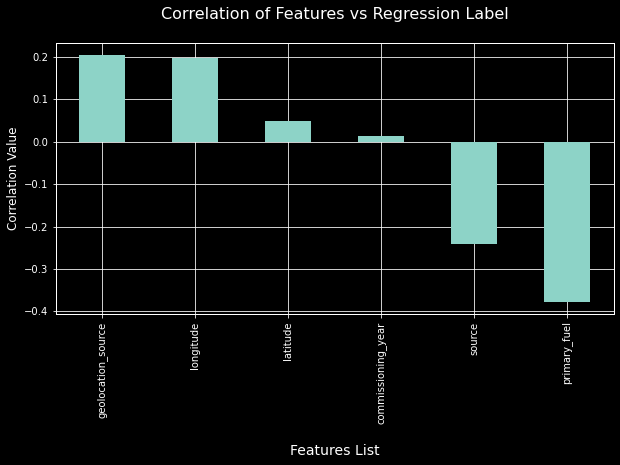

In [37]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['capacity_mw'].sort_values(ascending=False).drop('capacity_mw').plot.bar()
plt.title("Correlation of Features vs Regression Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

# Using zscore to remove the outliers

In [38]:
z=np.abs(zscore(df))
threashold=3
df1=df[(z<3).all(axis=1)]
df.shape,df1.shape

((908, 7), (839, 7))

In [39]:

loss=(df.shape[0]-df1.shape[0])/df.shape[0]*100
loss

7.599118942731277

As we have 7 to 8 % data loss so we should proceed ahead with it .

In [40]:
df=df1
df.shape

(839, 7)

In [41]:
df.skew()

capacity_mw           1.964097
latitude             -0.109264
longitude             0.846704
primary_fuel          0.419942
commissioning_year   -1.578180
source                1.794155
geolocation_source   -2.114267
dtype: float64

# Using Log Transform to fix the skewness

In [42]:
for col in float_datatypes:
    if df.skew().loc[col]>.55:
        df[col]=np.log1p(df[col])

# spiling whole dataset into two part namely 'X' and 'Y' for training and testing 

In [43]:
X=df.drop('primary_fuel',axis=1)
Y=df['primary_fuel']

In [44]:
Y.value_counts()

1    237
3    219
7    123
6    121
2     64
0     45
5     21
4      9
Name: primary_fuel, dtype: int64

# Treating Imbalance label counts by Over_sampling Smote method

In [45]:
sm=SMOTE()
X,Y=sm.fit_resample(X,Y)

In [46]:
Y.value_counts()

0    237
1    237
2    237
3    237
4    237
5    237
6    237
7    237
Name: primary_fuel, dtype: int64

# feature Scaling

In [47]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,-1.746482,1.465708,-0.855830,0.512664,1.288714,-1.194306
1,0.173820,0.860053,-0.452960,0.683953,2.693709,0.368729
2,-0.343982,0.352771,-2.036017,0.683953,-0.613433,0.368729
3,0.356255,0.701427,3.961619,-0.086845,-0.591818,0.368729
4,1.840533,0.362784,1.712895,0.855241,-0.591818,0.368729


we have used scaling method as Standard Scaling to avoid the problem of biasness 

# Finding best Random state for Building Classification Model

In [48]:

maxAccu=0
maxRS=0

for i in range(1, 500):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 73.41772151898735 on Random State 237


excellent , we got Random state as 305

# Machine Learning Model for Classification with Evaluation Metrics

In [49]:
# classification model function
def classify(model,X,Y):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25,random_state=305)
    
    #train the model
    model.fit(X_train,Y_train)
    
    #Predicting the Y_test
    pred=model.predict(X_test)
    
    #classification Report
    class_report=classification_report(Y_test,pred)
    print('classification Report',class_report)
    
    #Accuracy score
    accu_score=(accuracy_score(Y_test,pred))*100
    print('accuracy_score',accu_score)
    
    #cross validation 
    cross_val=(cross_val_score(model,X,Y, cv=5).mean())*100
    print('cross_val_score',cross_val)

    
    #final result
    final_result=(accu_score-cross_val)
    print('accuracy score - cross_val =', final_result)

In [50]:
#Logistic Regression
model=LogisticRegression()
classify(model,X,Y)

classification Report               precision    recall  f1-score   support

           0       0.76      0.78      0.77        58
           1       0.50      0.58      0.54        60
           2       0.58      0.22      0.32        49
           3       0.46      0.56      0.50        52
           4       0.71      0.80      0.75        69
           5       0.64      0.50      0.56        58
           6       1.00      0.98      0.99        61
           7       0.80      0.97      0.88        67

    accuracy                           0.69       474
   macro avg       0.68      0.67      0.67       474
weighted avg       0.69      0.69      0.68       474

accuracy_score 69.40928270042194
cross_val_score 68.40786001944174
accuracy score - cross_val = 1.0014226809801983


In [51]:
#Decision Tree Classifier
model=DecisionTreeClassifier()
classify(model,X,Y)

classification Report               precision    recall  f1-score   support

           0       0.96      0.95      0.96        58
           1       0.69      0.62      0.65        60
           2       0.71      0.73      0.72        49
           3       0.74      0.75      0.74        52
           4       0.85      0.87      0.86        69
           5       0.85      0.88      0.86        58
           6       1.00      1.00      1.00        61
           7       1.00      1.00      1.00        67

    accuracy                           0.86       474
   macro avg       0.85      0.85      0.85       474
weighted avg       0.86      0.86      0.86       474

accuracy_score 85.65400843881856
cross_val_score 85.86515761699765
accuracy score - cross_val = -0.21114917817908463


In [52]:
#support Vector classifier
model=SVC()
classify(model,X,Y)

classification Report               precision    recall  f1-score   support

           0       0.92      0.83      0.87        58
           1       0.72      0.55      0.62        60
           2       0.71      0.51      0.60        49
           3       0.73      0.77      0.75        52
           4       0.78      1.00      0.88        69
           5       0.77      0.79      0.78        58
           6       1.00      0.97      0.98        61
           7       0.82      0.97      0.89        67

    accuracy                           0.81       474
   macro avg       0.81      0.80      0.80       474
weighted avg       0.81      0.81      0.80       474

accuracy_score 81.22362869198312
cross_val_score 79.64199416747674
accuracy score - cross_val = 1.5816345245063843


In [53]:
#Random Forest Classifier
model=RandomForestClassifier()
classify(model,X,Y)

classification Report               precision    recall  f1-score   support

           0       0.97      0.98      0.97        58
           1       0.80      0.65      0.72        60
           2       0.80      0.76      0.78        49
           3       0.82      0.81      0.82        52
           4       0.84      0.99      0.91        69
           5       0.88      0.91      0.90        58
           6       1.00      1.00      1.00        61
           7       1.00      1.00      1.00        67

    accuracy                           0.89       474
   macro avg       0.89      0.89      0.89       474
weighted avg       0.89      0.89      0.89       474

accuracy_score 89.45147679324894
cross_val_score 90.61297042077487
accuracy score - cross_val = -1.1614936275259282


In [54]:
#AdaBoost Classifier
model=AdaBoostClassifier()
classify(model,X,Y)

classification Report               precision    recall  f1-score   support

           0       0.66      0.57      0.61        58
           1       0.00      0.00      0.00        60
           2       0.00      0.00      0.00        49
           3       0.18      1.00      0.30        52
           4       0.00      0.00      0.00        69
           5       0.00      0.00      0.00        58
           6       1.00      0.98      0.99        61
           7       0.00      0.00      0.00        67

    accuracy                           0.31       474
   macro avg       0.23      0.32      0.24       474
weighted avg       0.23      0.31      0.24       474

accuracy_score 30.590717299578056
cross_val_score 33.22844049437578
accuracy score - cross_val = -2.6377231947977258


In [55]:
#KNeighbor Classifier
model=KNeighborsClassifier()
classify(model,X,Y)

classification Report               precision    recall  f1-score   support

           0       0.91      0.91      0.91        58
           1       0.85      0.58      0.69        60
           2       0.69      0.69      0.69        49
           3       0.73      0.71      0.72        52
           4       0.80      0.94      0.87        69
           5       0.83      0.84      0.84        58
           6       1.00      0.98      0.99        61
           7       0.89      1.00      0.94        67

    accuracy                           0.84       474
   macro avg       0.84      0.83      0.83       474
weighted avg       0.84      0.84      0.84       474

accuracy_score 84.38818565400844
cross_val_score 85.28523816136648
accuracy score - cross_val = -0.8970525073580404


In [56]:
#ExtraTrees Classifier
model=ExtraTreesClassifier()
classify(model,X,Y)

classification Report               precision    recall  f1-score   support

           0       0.97      0.98      0.97        58
           1       0.83      0.65      0.73        60
           2       0.89      0.84      0.86        49
           3       0.80      0.83      0.81        52
           4       0.85      0.99      0.91        69
           5       0.90      0.91      0.91        58
           6       1.00      1.00      1.00        61
           7       0.99      1.00      0.99        67

    accuracy                           0.91       474
   macro avg       0.90      0.90      0.90       474
weighted avg       0.90      0.91      0.90       474

accuracy_score 90.50632911392405
cross_val_score 91.35050687404528
accuracy score - cross_val = -0.8441777601212266


# Hyper parameter tuning on  the best ML classification model

In [57]:
#choosing Extra Trees classifier
fmod_param=fmod_param = {'criterion' : ["gini", "entropy"],
              'n_jobs' : [2, 1, -1],
              'min_samples_split' : [2, 3, 4],
              'max_depth' : [20, 25, 30],
              'random_state' : [42, 45, 111]
             }

In [58]:
GSCV=GridSearchCV(ExtraTreesClassifier(), fmod_param, cv=5)

In [59]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 25, 30],
                         'min_samples_split': [2, 3, 4], 'n_jobs': [2, 1, -1],
                         'random_state': [42, 45, 111]})

In [60]:
print(GSCV.best_score_)
print(GSCV.best_params_)

0.8973165307635286
{'criterion': 'gini', 'max_depth': 30, 'min_samples_split': 4, 'n_jobs': 2, 'random_state': 45}


In [61]:
Final_Model = ExtraTreesClassifier(criterion="gini", max_depth=30, min_samples_split=4, n_jobs=2, random_state=42)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 92.19409282700421



I have successfully incorporated the Hyper Parameter Tuning on my Final Classification Model and received the accuracy score for it.

# AUC ROC Curve for multi class label¶

In [62]:
y_prob = Classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.994400 (macro),
0.994135 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.994062 (macro),
0.993826 (weighted by prevalence)


# confusion matrix

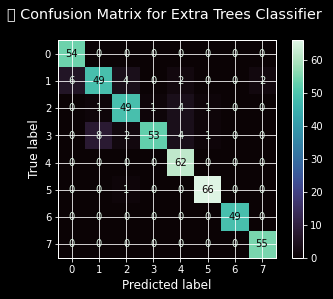

In [63]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Extra Trees Classifier \n')
plt.show()

# saving the model

In [64]:
filename="Final_Model classification 04"
joblib.dump(Final_Model,filename)

['Final_Model classification 04']

# For Building Regression Model Split whole dataset into Two parts Namely X and Y

In [65]:
X=df.drop('capacity_mw',axis=1)
Y=df["capacity_mw"]

# Feature Scaling

In [68]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head() # Displaying all the features after applying scaling technique to avoid bias output

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,1.154079,-0.911736,1.175163,0.468797,1.580000,-1.060641
1,0.598056,-0.567417,-0.983247,0.618009,3.127148,0.400570
2,0.132345,-1.920402,1.606845,0.618009,-0.514600,0.400570
3,0.452429,3.205575,-0.551565,-0.053442,-0.490798,0.400570
4,0.141538,1.283666,-0.983247,0.767220,-0.490798,0.400570


we have done Standard Scaling to avoid the biasing of data 

# To find the Random state for our best ML model

In [79]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)

Best R2 score is 0.538334072004571 on Random State 135


# Machine Learning Model for Regression Model with Evaluation Matrix

In [80]:
def reg(model,X,Y):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25, random_state=135)
    
    #trainning the Data
    classifier=model.fit(X_train,Y_train)
    
    #predict 
    pred=model.predict(X_test)
    
    #r2
    r2=(r2_score(pred,Y_test))*100
    print('r2_score',r2)
    
    #cv_score
    cv_score=cross_val_score(model,X,Y,cv=5).mean()*100
    print('cross_val_score',cv_score)
    
    #final result
    final_result=r2-cv_score          
    print('r2_score - cv_score =',final_result)

In [81]:
#LinearRegression
model=LinearRegression()
reg(model,X,Y)

r2_score -14.537300469228098
cross_val_score 42.231770897477126
r2_score - cv_score = -56.76907136670523


In [82]:
#support vector Regressor
model=SVR()
reg(model,X,Y)

r2_score 38.63825067655882
cross_val_score 50.370564446574996
r2_score - cv_score = -11.732313770016177


In [83]:
#Decision Tree Regressor
model=DecisionTreeRegressor()
reg(model,X,Y)

r2_score 49.602525683061636
cross_val_score 34.92877351536984
r2_score - cv_score = 14.673752167691795


In [84]:
#ExtraTrees Regressor
model=ExtraTreesRegressor()
reg(model,X,Y)

r2_score 60.52036976987443
cross_val_score 62.04288632309842
r2_score - cv_score = -1.5225165532239942


In [85]:
# Random Forest Regressor
model=RandomForestRegressor()
reg(model,X,Y)

r2_score 57.320605448769314
cross_val_score 62.11356705350954
r2_score - cv_score = -4.792961604740228


In [86]:
#AdaBoost Regressor
model=AdaBoostRegressor()
reg(model,X,Y)


r2_score 9.116533949703198
cross_val_score 55.880820868425076
r2_score - cv_score = -46.76428691872188


In [87]:
#Ridge
model=Ridge()
reg(model,X,Y)


r2_score -14.781563559101896
cross_val_score 42.236171114307474
r2_score - cv_score = -57.01773467340937


In [88]:
#Lasso
model=Lasso()
reg(model,X,Y)


r2_score -4.46719413254848e+32
cross_val_score -0.43299341696865223
r2_score - cv_score = -4.46719413254848e+32


# Hyper Parameter tuning on our best ML Regression Model


In [90]:
#took ExtraTrees Regressor
fmod_param = {'criterion' : ['mse', 'mae'],
              'n_estimators' : [100, 200],
              'min_samples_split' : [2, 3],
              'random_state' : [42, 135],
              'n_jobs' : [-1, 1]
             }

In [91]:
GSCV=GridSearchCV(ExtraTreesRegressor(), fmod_param, cv=5)

In [92]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 200], 'n_jobs': [-1, 1],
                         'random_state': [42, 135]})

In [94]:
print(GSCV.best_score_)
print(GSCV.best_params_)

0.6493263314962793
{'criterion': 'mse', 'min_samples_split': 3, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}


In [97]:
Final_Model = ExtraTreesRegressor(criterion='mse', min_samples_split=3, n_estimators=100, n_jobs=-1, random_state=42)
Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 64.67988346483102


# saving the best Regression Model

In [98]:
filename="Final_MOdel 05"
joblib.dump(Final_Model,filename)

['Final_MOdel 05']